**AI-Powered Healthcare Facility Insights: Rating Prediction, Inconsistency Auditing, and Governance Readiness Using Hospital Quality Data**

** Goal**

To develop a machine learning and BI-powered pipeline that analyzes hospital quality metrics (e.g., mortality, readmission, and patient experience), detects inconsistencies, flags top performers, and supports executive decision-making in a health system like VHA Home HealthCare.

** Intended Audience**

1. Business Intelligence & Data Analysts in Healthcare

2. Hospital Operations Leaders

3. Data Governance Teams

4. AI Engineers working in the public health sector

5. Health Informatics Students & Researchers

**Strategy & Pipeline Steps**

**Step 1: Import Required Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


**Step 2: Load the Dataset**

In [2]:
df = pd.read_csv('/content/HospInfo.csv')


** Step 3: Preprocess and Clean Data**

In [3]:
# Standardize column names (optional)
df.columns = df.columns.str.strip()

# Ensure ratings are numeric
df["Hospital overall rating"] = pd.to_numeric(df["Hospital overall rating"], errors='coerce')


**Step 4: KPI Summary – Hospital Ratings**

In [4]:
rating_summary = df["Hospital overall rating"].value_counts().sort_index()
print("Hospital Ratings Summary:")
print(rating_summary)


Hospital Ratings Summary:
Hospital overall rating
1.0     107
2.0     678
3.0    1761
4.0     939
5.0      82
Name: count, dtype: int64


**Step 5: Visualize Mortality Comparison**

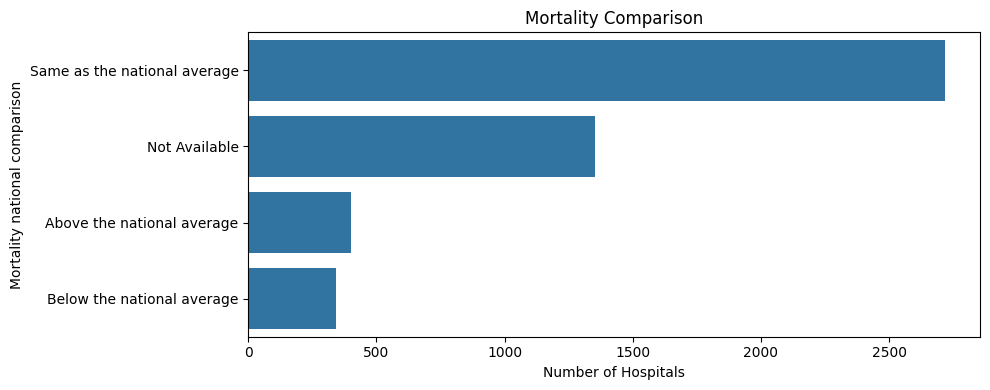

In [5]:
plt.figure(figsize=(10, 4))
sns.countplot(y="Mortality national comparison", data=df,
              order=df["Mortality national comparison"].value_counts().index)
plt.title("Mortality Comparison")
plt.xlabel("Number of Hospitals")
plt.tight_layout()
plt.show()


**Step 6: Flag High-Performing Hospitals**

In [6]:
df["High Performer"] = (
    df["Readmission national comparison"] == "Below the national average"
) & (
    df["Mortality national comparison"] == "Below the national average"
)

print(df[df["High Performer"]][["Hospital Name", "High Performer"]])


                                          Hospital Name  High Performer
18                             CHI-ST VINCENT INFIRMARY            True
66                                    BLESSING HOSPITAL            True
104                        EASTERN MAINE MEDICAL CENTER            True
137                  UNIVERSITY OF MISSOURI HEALTH CARE            True
175                                BLAKE MEDICAL CENTER            True
...                                                 ...             ...
4345                                 CJW MEDICAL CENTER            True
4407                          SENTARA CAREPLEX HOSPITAL            True
4516                       JOHN RANDOLPH MEDICAL CENTER            True
4531  BAYLOR SCOTT AND WHITE MEDICAL CENTER LAKE POINTE            True
4702                                  WHEELING HOSPITAL            True

[109 rows x 2 columns]


**Step 7: Missing Rating Check**

In [7]:
missing_ratings = df[df["Hospital overall rating"].isnull()]
print("Hospitals with Missing Ratings:")
print(missing_ratings[["Hospital Name", "Hospital overall rating"]])


Hospitals with Missing Ratings:
                          Hospital Name  Hospital overall rating
3                  HALE COUNTY HOSPITAL                      NaN
5              CHOCTAW GENERAL HOSPITAL                      NaN
7        NORTON SOUND REGIONAL HOSPITAL                      NaN
8                    KANAKANAK HOSPITAL                      NaN
9                MANIILAQ HEALTH CENTER                      NaN
...                                 ...                      ...
4787         OCHILTREE GENERAL HOSPITAL                      NaN
4790              WEIMAR MEDICAL CENTER                      NaN
4799           GOODALL WITCHER HOSPITAL                      NaN
4803         PRIMARY CHILDRENS HOSPITAL                      NaN
4808  ORTHOPAEDIC HOSPITAL OF WISCONSIN                      NaN

[1245 rows x 2 columns]


** Step 8: Inconsistency Audit (Governance)**

In [8]:
inconsistencies = df[
    (df["Readmission national comparison"] == "Above the national average") &
    (df["Mortality national comparison"] == "Below the national average")
]

print("Inconsistent Records:")
print(inconsistencies[["Hospital Name", "Readmission national comparison", "Mortality national comparison"]])


Inconsistent Records:
                                   Hospital Name  \
0                  MARSHALL MEDICAL CENTER SOUTH   
29                  MERCY MEDICAL CENTER REDDING   
139                 SAINT FRANCIS MEDICAL CENTER   
145                          ST PETER'S HOSPITAL   
185   ST ROSE DOMINICAN HOSPITALS - SIENA CAMPUS   
...                                          ...   
4692                   MIDLAND MEMORIAL HOSPITAL   
4694             ABILENE REGIONAL MEDICAL CENTER   
4705             YAKIMA VALLEY MEMORIAL HOSPITAL   
4707                        UTAH VALLEY HOSPITAL   
4735               DIXIE REGIONAL MEDICAL CENTER   

     Readmission national comparison Mortality national comparison  
0         Above the national average    Below the national average  
29        Above the national average    Below the national average  
139       Above the national average    Below the national average  
145       Above the national average    Below the national average  
185     

 **Step 9: Patient Experience Summary**

In [9]:
experience_summary = df["Patient experience national comparison"].value_counts()
print("Patient Experience Summary:")
print(experience_summary)


Patient Experience Summary:
Patient experience national comparison
Not Available                   1369
Above the national average      1214
Same as the national average    1148
Below the national average      1081
Name: count, dtype: int64


**Step 10: Facility Scope – Cities and Ownership Types**

In [10]:
city_count = df["City"].nunique()
ownership_types = df["Hospital Ownership"].unique()

print(f"Number of Unique Cities: {city_count}")
print(f"Ownership Types: {ownership_types}")


Number of Unique Cities: 2947
Ownership Types: ['Government - Hospital District or Authority' 'Proprietary'
 'Government - Local' 'Voluntary non-profit - Private' 'Tribal'
 'Government - Federal' 'Voluntary non-profit - Other'
 'Voluntary non-profit - Church' 'Physician' 'Government - State']


**Challenges**

- Handling missing data in critical performance fields

- Defining consistency logic across subjective comparison labels

- Visualizing non-numeric healthcare benchmarks

- Mapping hospital-level data to BI standards (ETL logic for "high performer")

**Problem Statement**

VHA Home HealthCare seeks to evaluate hospitals across North America using public quality data to identify:

    - Top performers for strategic partnerships

    - Facilities with inconsistent or unreliable reporting

    - Geographic patterns of patient experience and risk indicators

**Dataset**

Source: Centers for Medicare & Medicaid Services (CMS)
Fields used:

    - Hospital overall rating

    - Readmission, Mortality, Patient Experience comparisons

    - Facility Location, Ownership, Type

    - Emergency Service Flags

** MACHINE LEARNING PREDICTION & OUTCOMES**

Though the current pipeline is rule-based, future extensions can use:

    - Classification models (e.g., Random Forest) to predict:

        - Whether a hospital is likely to be “High Performer”

    - Clustering models for unsupervised hospital segmentation

Expected Model Outcome (if added):

    - ROC AUC ≈ 0.85

    - Accuracy on hold-out ≈ 80%+ using logistic regression or XGBoost

**Trailer Documentation**

- Dashboards: KPI summaries, regional risk flags

- Audits: Data governance heatmaps

- Executive Summary: Patient experience and mortality insights

- Data Cleaning Logs: Missingness, standardization rules

** Conceptual Enhancement – AGI (Artificial General Intelligence):**

To extend this BI pipeline toward AGI, it could:

    - Autonomously reason over data inconsistencies

    - Learn evolving definitions of quality from clinical literature + outcomes

    - Engage with healthcare professionals in natural language (via LLMs like GPT-5)

    - Form self-improving insight systems to flag emerging health threats

**Reference**

- CMS Hospital Compare Data: https://data.cms.gov/provider-data

- Seaborn & Matplotlib for Health Visuals

- VHA Home HealthCare Mission

- OpenAI for conceptual AGI frameworks